# Intro to Recommender Systems Lab

Complete the exercises below to solidify your knowledge and understanding of recommender systems.

For this lab, we are going to be putting together a user similarity based recommender system in a step-by-step fashion. Our data set contains customer grocery purchases, and we will use similar purchase behavior to inform our recommender system. Our recommender system will generate 5 recommendations for each customer based on the purchases they have made.

In [260]:
import pandas as pd
import numpy as np
import pprint
import matplotlib.pyplot as plt
import matplotlib.pylab
from scipy.spatial.distance import pdist, squareform

In [33]:
data = pd.read_csv('../data/customer_product_sales.csv')

In [4]:
data.head()

,CustomerID,FirstName,LastName,SalesID,ProductID,ProductName,Quantity
0,61288,Rosa,Andersen,134196,229,Bread - Hot Dog Buns,16
1,77352,Myron,Murray,6167892,229,Bread - Hot Dog Buns,20
2,40094,Susan,Stevenson,5970885,229,Bread - Hot Dog Buns,11
3,23548,Tricia,Vincent,6426954,229,Bread - Hot Dog Buns,6
4,78981,Scott,Burch,819094,229,Bread - Hot Dog Buns,20


In [5]:
print("Total differents products: ",data.ProductID.unique().sum())

Total differents products:  102378


In [6]:
print("Total differents clients: ",data.CustomerID.unique().sum())

Total differents clients:  48987439


In [7]:
data.isnull().sum(axis = 0)

CustomerID     0
FirstName      0
LastName       0
SalesID        0
ProductID      0
ProductName    0
Quantity       0
dtype: int64

## Step 1: Create a data frame that contains the total quantity of each product purchased by each customer.

You will need to group by CustomerID and ProductName and then sum the Quantity field.

In [140]:
quantity_customer = data.groupby(by=['CustomerID', 'ProductName']).agg({'Quantity':'sum'})
quantity_customer.head()

Quantity
CustomerID ProductName                            
33         Apricots - Dried                      1
           Assorted Desserts                     1
           Bandage - Flexible Neon               1
           Bar Mix - Pina Colada, 355 Ml         1
           Beans - Kidney, Canned                1

## Step 2: Use the `pivot_table` method to create a product by customer matrix.

The rows of the matrix should represent the products, the columns should represent the customers, and the values should be the quantities of each product purchased by each customer. You will also need to replace nulls with zeros, which you can do using the `fillna` method.

In [42]:
customer_matrix = data.pivot_table(index='ProductName',values='Quantity',columns='CustomerID',aggfunc='sum').fillna(0)
customer_matrix.head()

CustomerID,33,200,264,356,412,464,477,639,649,669,...,97697,97753,97769,97793,97900,97928,98069,98159,98185,98200
ProductName,,,,,,,,,,,,,,,,,,,,,
Anchovy Paste - 56 G Tube,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Appetizer - Mini Egg Roll, Shrimp",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Appetizer - Mushroom Tart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0
Appetizer - Sausage Rolls,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,25.0,25.0,25.0,0.0,25.0,0.0
Apricots - Dried,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Step 3: Create a customer similarity matrix using `squareform` and `pdist`. For the distance metric, choose "euclidean."

In [50]:
distances = squareform(pdist(customer_matrix.T, 'euclidean'))
distances

array([[  0.        ,  11.91637529,  10.48808848, ..., 228.62851966,
        239.        , 229.77380181],
       [ 11.91637529,   0.        ,  11.74734012, ..., 228.01096465,
        239.03765394, 229.70415756],
       [ 10.48808848,  11.74734012,   0.        , ..., 228.08112592,
        238.26665734, 229.77380181],
       ...,
       [228.62851966, 228.01096465, 228.08112592, ...,   0.        ,
        304.13812651, 305.16389039],
       [239.        , 239.03765394, 238.26665734, ..., 304.13812651,
          0.        , 303.10889132],
       [229.77380181, 229.70415756, 229.77380181, ..., 305.16389039,
        303.10889132,   0.        ]])

In [53]:
similarity = pd.DataFrame(1/(1 + distances), 
                         index=customer_matrix.columns, columns=customer_matrix.columns)
similarity.head()

CustomerID,33,200,264,356,412,464,477,639,649,669,...,97697,97753,97769,97793,97900,97928,98069,98159,98185,98200
CustomerID,,,,,,,,,,,,,,,,,,,,,
33,1.000000,0.077421,0.087047,0.081800,0.080634,0.082709,0.074573,0.083020,0.081503,0.080070,...,0.004811,0.004669,0.004412,0.005019,0.004312,0.004515,0.004583,0.004355,0.004167,0.004333
200,0.077421,1.000000,0.078448,0.076435,0.073693,0.075255,0.075956,0.076435,0.077674,0.076923,...,0.004824,0.004681,0.004431,0.005047,0.004311,0.004521,0.004614,0.004367,0.004166,0.004335
264,0.087047,0.078448,1.000000,0.080070,0.081800,0.080350,0.076923,0.080634,0.082100,0.078448,...,0.004822,0.004674,0.004416,0.005035,0.004322,0.004543,0.004595,0.004365,0.004179,0.004333
356,0.081800,0.076435,0.080070,1.000000,0.076435,0.078187,0.075025,0.082403,0.077171,0.075956,...,0.004816,0.004671,0.004416,0.005038,0.004310,0.004526,0.004578,0.004365,0.004175,0.004339
412,0.080634,0.073693,0.081800,0.076435,1.000000,0.078711,0.075025,0.082403,0.078187,0.078448,...,0.004810,0.004702,0.004414,0.005034,0.004318,0.004530,0.004578,0.004367,0.004177,0.004349


## Step 4: Check your results by generating a list of the top 5 most similar customers for a specific CustomerID.

In [132]:
target_customer = 33

recommenders= similarity[target_customer].sort_values(ascending=False)
recommenders[1:6]

CustomerID
264     0.087047
3535    0.087047
3317    0.087047
2503    0.085983
3305    0.085638
Name: 33, dtype: float64

In [134]:
top_recommenders = recommenders[1:6].index.tolist()
top_recommenders

[264, 3535, 3317, 2503, 3305]

## Step 5: From the data frame you created in Step 1, select the records for the list of similar CustomerIDs you obtained in Step 4.

In [135]:
data_recommeders = quantity_customer.loc[top_recommenders]
data_recommeders.head()

Quantity
CustomerID ProductName                         
264        Apricots - Halves                  1
           Apricots Fresh                     1
           Bacardi Breezer - Tropical         1
           Bagel - Plain                      1
           Banana - Leaves                    1

## Step 6: Aggregate those customer purchase records by ProductName, sum the Quantity field, and then rank them in descending order by quantity.

This will give you the total number of each product purchased by the 5 most similar customers to the customer you selected in order from most purchased to least.

In [136]:
ranked_products = data_recommeders.groupby(by='ProductName').agg({'Quantity':'sum'}).sort_values(by='Quantity',ascending=False)
ranked_products.head()

,Quantity
ProductName,
Butter - Unsalted,3
Wine - Ej Gallo Sierra Valley,3
Towels - Paper / Kraft,3
Soup - Campbells Bean Medley,3
Wine - Blue Nun Qualitatswein,3


## Step 7: Filter the list for products that the chosen customer has not yet purchased and then recommend the top 5 products with the highest quantities that are left.

- Merge the ranked products data frame with the customer product matrix on the ProductName field.
- Filter for records where the chosen customer has not purchased the product.
- Show the top 5 results.

In [137]:
df7 = pd.merge(ranked_products, customer_matrix, on='ProductName')
df7.head()

,Quantity,33,200,264,356,412,464,477,639,649,...,97697,97753,97769,97793,97900,97928,98069,98159,98185,98200
ProductName,,,,,,,,,,,,,,,,,,,,,
Butter - Unsalted,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0
Wine - Ej Gallo Sierra Valley,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,25.0,50.0,0.0,25.0,0.0,0.0,0.0,0.0
Towels - Paper / Kraft,3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Soup - Campbells Bean Medley,3,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,25.0,50.0,25.0,0.0,0.0,0.0,0.0
Wine - Blue Nun Qualitatswein,3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0


In [138]:
df71= df7[df7[target_customer]==0].sort_values(by='Quantity',ascending=False)
df71['Quantity'][0:5]


ProductName
Butter - Unsalted                3
Soup - Campbells Bean Medley     3
Wine - Blue Nun Qualitatswein    3
Wine - Ej Gallo Sierra Valley    3
Beans - Wax                      2
Name: Quantity, dtype: int64

## Step 8: Now that we have generated product recommendations for a single user, put the pieces together and iterate over a list of all CustomerIDs.

- Create an empty dictionary that will hold the recommendations for all customers.
- Create a list of unique CustomerIDs to iterate over.
- Iterate over the customer list performing steps 4 through 7 for each and appending the results of each iteration to the dictionary you created.

In [168]:
customers=data['CustomerID'].unique()
customers= np.sort(customers)
customers[0:10]

array([ 33, 200, 264, 356, 412, 464, 477, 639, 649, 669])

In [228]:
def recommender(customers,data):
    recommendations = {}

    quantity_customer = data.groupby(by=['CustomerID', 'ProductName']).agg({'Quantity':'sum'})
    customer_matrix = data.pivot_table(index='ProductName',values='Quantity',columns='CustomerID',aggfunc='sum').fillna(0)
    distances = squareform(pdist(customer_matrix.T, 'euclidean'))
    similarity = pd.DataFrame(1/(1 + distances), 
                             index=customer_matrix.columns, columns=customer_matrix.columns)
    
    for customer in customers:
        recommenders= similarity[customer].sort_values(ascending=False)
        top_recommenders = recommenders[1:6].index.tolist()
        data_recommeders = quantity_customer.loc[top_recommenders]
        ranked_products = data_recommeders.groupby(by='ProductName').agg({'Quantity':'sum'}).sort_values(by='Quantity',ascending=False)
        df7 = pd.merge(ranked_products, customer_matrix, on='ProductName')
        df71= df7[df7[customer]==0].sort_values(by='Quantity',ascending=False)

        products = df71['Quantity'][0:5]
        products = products.reset_index()
        recommendations[customer]= products['ProductName']
    return recommendations

##  Step 9: Store the results in a Pandas data frame. The data frame should a column for Customer ID and then a column for each of the 5 product recommendations for each customer.

In [229]:
recommendation_matrix = pd.DataFrame(recommender(customers,data))
recommendation_matrix.head()

,33,200,264,356,412,464,477,639,649,669,...,97697,97753,97769,97793,97900,97928,98069,98159,98185,98200
0,Butter - Unsalted,Soup - Campbells Bean Medley,Soupfoamcont12oz 112con,"Veal - Inside, Choice",Olive - Spread Tapenade,Butter - Unsalted,Olive - Spread Tapenade,Cod - Black Whole Fillet,Bar - Granola Trail Mix Fruit Nut,"Veal - Inside, Choice",...,Cheese - Wine,Muffin Batt - Choc Chk,"Pork - Loin, Bone - In",Fenngreek Seed,"Placemat - Scallop, White","Soup - Campbells, Lentil",Skirt - 29 Foot,"Lamb - Whole, Fresh",Crackers - Trio,Beans - Wax
1,Soup - Campbells Bean Medley,Bay Leaf,Bread - Italian Roll With Herbs,Beef - Inside Round,Wine - Blue Nun Qualitatswein,"Pepper - Black, Whole",Wine - Blue Nun Qualitatswein,Wine - Ej Gallo Sierra Valley,Appetizer - Mushroom Tart,Wine - Ej Gallo Sierra Valley,...,"Lentils - Red, Dry",Papayas,Potatoes - Idaho 100 Count,Ice Cream Bar - Oreo Cone,Rum - Mount Gay Eclipes,"Cheese - Brie,danish",Cheese - Taleggio D.o.p.,Tea - English Breakfast,Pernod,Sherry - Dry
2,Wine - Blue Nun Qualitatswein,Pork - Kidney,"Veal - Inside, Choice",Beef - Top Sirloin,"Pepper - Black, Whole","Peas - Pigeon, Dry","Veal - Inside, Choice",Yoghurt Tubes,"Peas - Pigeon, Dry","Pepper - Black, Whole",...,Meldea Green Tea Liquor,Meldea Green Tea Liquor,Pants Custom Dry Clean,Halibut - Fletches,Tofu - Firm,Wiberg Super Cure,Beans - Kidney White,Bread - Raisin Walnut Oval,Tea - Jasmin Green,Pork - Hock And Feet Attached
3,Wine - Ej Gallo Sierra Valley,Wanton Wrap,"Fish - Scallops, Cold Smoked",Sardines,Soup - Campbells Bean Medley,Bar - Granola Trail Mix Fruit Nut,"Pepper - Black, Whole","Pepper - Black, Whole","Pepper - Black, Whole",Wine - Blue Nun Qualitatswein,...,Muffin - Carrot Individual Wrap,Wine - Chablis 2003 Champs,Cake - Box Window 10x10x2.5,"Wine - Red, Colio Cabernet",Sobe - Tropical Energy,Pants Custom Dry Clean,Milk - 1%,Chips Potato Salt Vinegar 43g,Pastry - Choclate Baked,Pears - Bosc
4,Beans - Wax,Muffin - Carrot Individual Wrap,Fondant - Icing,Lamb - Ground,"Sauce - Gravy, Au Jus, Mix","Veal - Inside, Choice",Cheese - Cambozola,Soupfoamcont12oz 112con,Lamb - Ground,Sardines,...,Coffee - Dark Roast,Mussels - Frozen,Cod - Black Whole Fillet,Grenadine,"Cheese - Boursin, Garlic / Herbs",Shrimp - 31/40,Yoghurt Tubes,Curry Paste - Madras,"Peas - Pigeon, Dry","Soup - Campbells, Cream Of"


## Step 10: Change the distance metric used in Step 3 to something other than euclidean (correlation, cityblock, consine, jaccard, etc.). Regenerate the recommendations for all customers and note the differences.

In [230]:
def recommender(customers,data,metric):
    recommendations = {}

    quantity_customer = data.groupby(by=['CustomerID', 'ProductName']).agg({'Quantity':'sum'})
    customer_matrix = data.pivot_table(index='ProductName',values='Quantity',columns='CustomerID',aggfunc='sum').fillna(0)
    
    distances = squareform(pdist(customer_matrix.T, metric))
    
    similarity = pd.DataFrame(1/(1 + distances), 
                             index=customer_matrix.columns, columns=customer_matrix.columns)
    
    for customer in customers:
        recommenders= similarity[customer].sort_values(ascending=False)
        top_recommenders = recommenders[1:6].index.tolist()
        data_recommeders = quantity_customer.loc[top_recommenders]
        ranked_products = data_recommeders.groupby(by='ProductName').agg({'Quantity':'sum'}).sort_values(by='Quantity',ascending=False)
        df7 = pd.merge(ranked_products, customer_matrix, on='ProductName')
        df71= df7[df7[customer]==0].sort_values(by='Quantity',ascending=False)

        products = df71['Quantity'][0:5]
        products = products.reset_index()
        recommendations[customer]= products['ProductName']
    return recommendations

In [245]:
rcomd_df_eu = pd.DataFrame(recommender(customers,data,'euclidean'))
rcomd_df_eu.rename(columns=lambda x: str(x) + "_EUCLIDEAN", inplace=True)

rcomd_df_co = pd.DataFrame(recommender(customers,data,'correlation'))
rcomd_df_co.rename(columns=lambda x: str(x) + "_CORRELATION", inplace=True)

rcomd_df_ci = pd.DataFrame(recommender(customers,data,'cityblock'))
rcomd_df_ci.rename(columns=lambda x: str(x) + "_CITYBLOCK", inplace=True)

rcomd_df_cosi = pd.DataFrame(recommender(customers,data,'cosine'))
rcomd_df_cosi.rename(columns=lambda x: str(x) + "_COSINE", inplace=True)

rcomd_df_ja = pd.DataFrame(recommender(customers,data,'jaccard'))
rcomd_df_ja.rename(columns=lambda x: str(x) + "_JACCARD", inplace=True)

In [253]:
comparation_df = pd.concat([rcomd_df_eu, rcomd_df_co, rcomd_df_ci,
                           rcomd_df_cosi, rcomd_df_ja],join="inner",axis=1)
comparation_df

,33_EUCLIDEAN,200_EUCLIDEAN,264_EUCLIDEAN,356_EUCLIDEAN,412_EUCLIDEAN,464_EUCLIDEAN,477_EUCLIDEAN,639_EUCLIDEAN,649_EUCLIDEAN,669_EUCLIDEAN,...,97697_JACCARD,97753_JACCARD,97769_JACCARD,97793_JACCARD,97900_JACCARD,97928_JACCARD,98069_JACCARD,98159_JACCARD,98185_JACCARD,98200_JACCARD
0,Butter - Unsalted,Soup - Campbells Bean Medley,Soupfoamcont12oz 112con,"Veal - Inside, Choice",Olive - Spread Tapenade,Butter - Unsalted,Olive - Spread Tapenade,Cod - Black Whole Fillet,Bar - Granola Trail Mix Fruit Nut,"Veal - Inside, Choice",...,Cheese - Parmesan Grated,Spice - Peppercorn Melange,Coffee - Irish Cream,"Cheese - Brie,danish",Fenngreek Seed,Tray - 16in Rnd Blk,Spinach - Baby,Chocolate - Compound Coating,Coffee - Irish Cream,Muffin - Carrot Individual Wrap
1,Soup - Campbells Bean Medley,Bay Leaf,Bread - Italian Roll With Herbs,Beef - Inside Round,Wine - Blue Nun Qualitatswein,"Pepper - Black, Whole",Wine - Blue Nun Qualitatswein,Wine - Ej Gallo Sierra Valley,Appetizer - Mushroom Tart,Wine - Ej Gallo Sierra Valley,...,Flour - Whole Wheat,Rum - Mount Gay Eclipes,Garlic,"Beer - Alexander Kieths, Pale Ale",Vinegar - Sherry,Pastry - Choclate Baked,Tea - Jasmin Green,Mustard Prepared,Soup V8 Roasted Red Pepper,Wine - Magnotta - Belpaese
2,Wine - Blue Nun Qualitatswein,Pork - Kidney,"Veal - Inside, Choice",Beef - Top Sirloin,"Pepper - Black, Whole","Peas - Pigeon, Dry","Veal - Inside, Choice",Yoghurt Tubes,"Peas - Pigeon, Dry","Pepper - Black, Whole",...,Mussels - Frozen,Juice - Orange,Beef - Striploin Aa,"Salsify, Organic",Pastry - Choclate Baked,Pernod,Bread - French Baquette,Apricots - Halves,Grapes - Red,Veal - Slab Bacon
3,Wine - Ej Gallo Sierra Valley,Wanton Wrap,"Fish - Scallops, Cold Smoked",Sardines,Soup - Campbells Bean Medley,Bar - Granola Trail Mix Fruit Nut,"Pepper - Black, Whole","Pepper - Black, Whole","Pepper - Black, Whole",Wine - Blue Nun Qualitatswein,...,Wine - Ej Gallo Sierra Valley,Fond - Neutral,"Rum - Coconut, Malibu",Quiche Assorted,Bread - Italian Corn Meal Poly,Mayonnaise - Individual Pkg,Cheese - Parmesan Cubes,Bouq All Italian - Primerba,Blackberries,Oil - Shortening - All - Purpose
4,Beans - Wax,Muffin - Carrot Individual Wrap,Fondant - Icing,Lamb - Ground,"Sauce - Gravy, Au Jus, Mix","Veal - Inside, Choice",Cheese - Cambozola,Soupfoamcont12oz 112con,Lamb - Ground,Sardines,...,Veal - Slab Bacon,Bread Crumbs - Panko,Vinegar - Sherry,Wine - Valpolicella Masi,Chicken - Soup Base,Banana Turning,Beef - Ground Medium,Assorted Desserts,Puree - Mocha,"Turnip - White, Organic"


In [233]:
x= ['Euclidean','Correlation','Cityblock','Cosine','Jaccard']
y_eu = recommendation_matrix_eu[33].to_list()
y_co = recommendation_matrix_co[33].to_list()
y_ci = recommendation_matrix_ci[33].to_list()
y_cosi = recommendation_matrix_cosi[33].to_list()
y_ja = recommendation_matrix_ja[33].to_list()

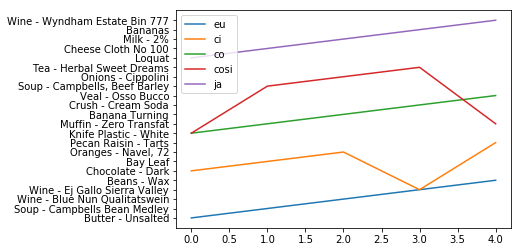

In [272]:
plt.plot(y_eu, label='eu')
plt.plot(y_ci, label='ci')
plt.plot(y_co, label='co')
plt.plot(y_cosi, label='cosi')
plt.plot(y_ja, label='ja')
plt.legend(loc="upper left")

In [ ]:
In this example, using the values obtained for the customer '33', it is easy to see that there are a lot of differences by using each metric.
It seems that cosi and co are the closest metrics since they match in 2 points.